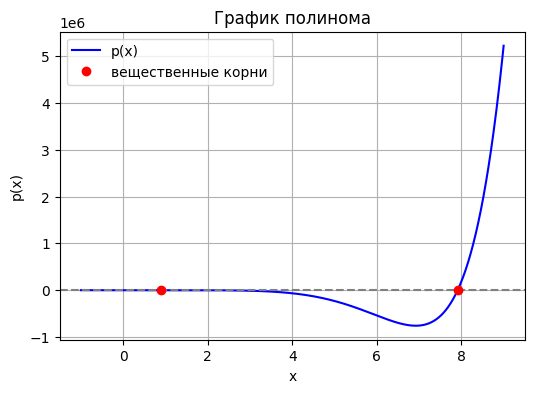

корень x = 7.9122089831+0.0000000000j, p(x) = 7.45e-09+0.00e+00j
корень x = 0.9285184597+1.1002042320j, p(x) = -3.55e-14+2.31e-14j
корень x = 0.9285184597-1.1002042320j, p(x) = -3.55e-14-2.31e-14j
корень x = -0.9950897160+0.5934875424j, p(x) = -2.22e-13+1.22e-13j
корень x = -0.9950897160-0.5934875424j, p(x) = -2.22e-13-1.22e-13j
корень x = -0.3834591267+0.9630057371j, p(x) = -3.95e-14-3.58e-15j
корень x = -0.3834591267-0.9630057371j, p(x) = -3.95e-14+3.58e-15j
корень x = 0.8878517829+0.0000000000j, p(x) = -1.35e-14+0.00e+00j


In [1]:
# Импорт библиотек numpy и matplotlib:
import numpy as np
import matplotlib.pyplot as plt

# Функция для вычисления значений полинома:
def p(x, coeffs):
    c = np.array(coeffs[::-1])
    return np.sum([p * (x**i) for i, p in enumerate(c)], axis=0)

# Коэффициенты полинома p(x) в порядке убывания степеней:
coeffs = [1, -7.9, 0, 0, -3.7, -18, -5, 1, 21]

# Нахождение всех корней (в т.ч. комплексных):
roots = np.roots(coeffs)

# Фильтрация вещественных корней:
real_roots = [r.real for r in roots if np.isclose(r.imag, 0, atol=1e-10)]

# Диапазон x для построения графика (по вещественным корням):
x_min = int(np.floor(min(real_roots))) - 1
x_max = int(np.ceil(max(real_roots))) + 1
x = np.linspace(x_min, x_max, 1000)
y = p(x, coeffs)

# Построение графика:
plt.figure(figsize=(6, 4))
plt.plot(x, y, label="p(x)", color="b")
plt.axhline(0, color="gray", linestyle="--")

# Отметка вещественных корней точками на оси x:
for r in real_roots:
    plt.plot(r, 0, "ro", label="вещественные корни" 
             if r == real_roots[0] else "")

# Стиль и заголовки графика:
plt.xlabel("x")
plt.ylabel("p(x)")
plt.title("График полинома")
plt.grid(True)
plt.legend()
plt.show()

# Вывод корней:
for r in roots:
    val = p(r, coeffs)
    print(f"корень x = {r:.10f}, p(x) = {val:.2e}")

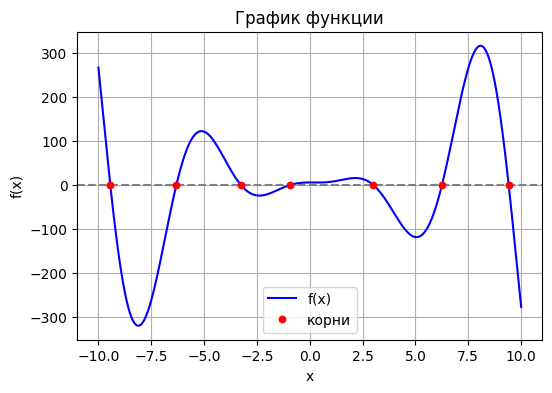

1 корень x = -9.4382481036, f(x) = 1.02e-12
2 корень x = -6.3132834363, f(x) = 4.62e-14
3 корень x = -0.9380654696, f(x) = 8.88e-16
4 корень x = -3.2544130877, f(x) = -2.22e-14
5 корень x = 3.0099017378, f(x) = -7.11e-15
6 корень x = 6.2524994986, f(x) = -4.14e-11
7 корень x = 9.4112303763, f(x) = -1.67e-11


In [2]:
# Импорт библиотек numpy, matplotlib и scipy:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

# Заданный параметр:
w = 5

# Функция f(x):
def f(x):
    return 6 * np.cos(x) + w * x**2 * np.sin(x)

# Интервал и начальное приближение:
x_min, x_max = -10, 10
intervals = 10
#x = np.linspace(x_min, x_max, intervals)
x = [-9.5, -6, -1, -3, 3, 6, 9.5] # согласно графику

roots = []  # пустой список из корней

# Поиск и добавление корней:
for xi in x:
    root = fsolve(f, xi)
    roots.append(root[0])

# Построение графика:
x = np.linspace(x_min, x_max, 1000)
y = f(x)
plt.figure(figsize=(6, 4))
plt.plot(x, y, label="f(x)", color="b")
plt.axhline(0, color="gray", linestyle="--")

# Нанесение корней:
for r in roots:
    plt.plot(r, 0, "ro", markersize=4.6, label="корни"
             if r == roots[0] else "")

# Стиль и заголовки графика:
plt.title("График функции")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()

# Вывод корней:
for i, r in enumerate(roots, 1):
    print(f"{i} корень x = {r:.10f}, f(x) = {f(r):.2e}")

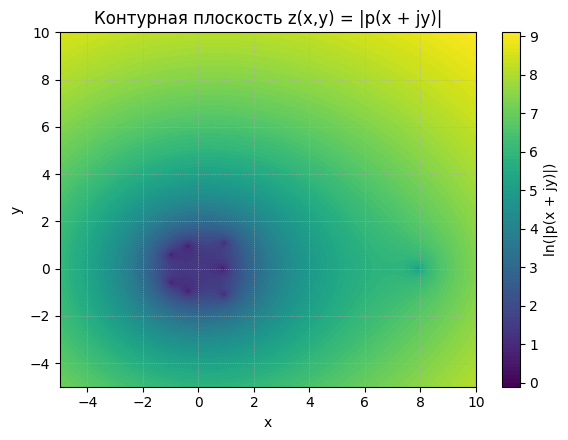

In [3]:
# Импорт библиотек numpy и matplotlib:
import numpy as np
import matplotlib.pyplot as plt

# Коэффициенты полинома:
coeffs = [1, -7.9, 0, 0, -3.7, -18, -5, 1, 21]

# Фиксированные границы области по x и y
x_min, x_max = -5, 10
y_min, y_max = -5, 10

# Сетка по x и y:
x_v = np.linspace(x_min, x_max, 500)
y_v = np.linspace(y_min, y_max, 500)
X, Y = np.meshgrid(x_v, y_v)

# Комплексная переменная X + jY:
comp = X + 1j * Y

# Вычисление значений полинома:
def p(comp, coeffs):
    c = np.array(coeffs[::-1])
    return sum(c[i] * comp**i for i in range(len(c)))

# Модуль p(X + jY):
P_abs = np.abs(p(comp, coeffs))

# Лог. значение |p(X + jY)|:
P_log = np.log10(P_abs + 1e-10)  # 1e-10 для избежания log(0)

# Построение контурной плоскости:
plt.figure(figsize=(6, 4.5))
contour = plt.contourf(X, Y, P_log, levels=100, cmap="viridis")

# Цветовая шкала:
cbar = plt.colorbar(contour)
cbar.set_label("ln(|p(x + jy)|)")

# Оформление графика:
plt.title("Контурная плоскость z(x,y) = |p(x + jy)|")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True, linestyle=":", linewidth=0.5)
plt.tight_layout()
plt.show()
